## Thera Bank Personal Loan Campaign 
 
Data Description: The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

## Context
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.
 

### Steps and tasks:
1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks) 
2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks) 
 Number of unique in each column? 
 Number of people with zero mortgage? 
 Number of people with zero credit card spending per month? 
 Value counts of all categorical columns. 
 Univariate and Bivariate 
 Get data model ready 
 
3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks) 
 
4. Use Logistic Regression model to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance (15 marks) 
 
5. Give your reasoning on how can the model perform better? (10 marks) Hint: Check parameter 
 
6. Give Business understanding of your model? (5 marks) 

### Load Libraries and Data

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

In [12]:
# import data
bankdata = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [13]:
# check datatype of each variable
bankdata.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [14]:
#statistical summary
bankdata.describe(include = 'all')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,"5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00"
mean,"2,500.50",45.34,20.10,73.77,"93,152.50",2.40,1.94,1.88,56.50,0.10,0.10,0.06,0.60,0.29
std,"1,443.52",11.46,11.47,46.03,"2,121.85",1.15,1.75,0.84,101.71,0.29,0.31,0.24,0.49,0.46
min,1.00,23.00,-3.00,8.00,"9,307.00",1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,250.75",35.00,10.00,39.00,"91,911.00",1.00,0.70,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"2,500.50",45.00,20.00,64.00,"93,437.00",2.00,1.50,2.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,"3,750.25",55.00,30.00,98.00,"94,608.00",3.00,2.50,3.00,101.00,0.00,0.00,0.00,1.00,1.00
max,"5,000.00",67.00,43.00,224.00,"96,651.00",4.00,10.00,3.00,635.00,1.00,1.00,1.00,1.00,1.00


In [15]:
# check number of rows and columns of data
bankdata.shape

(5000, 14)

In [16]:
# Check for null values
bankdata.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [17]:
bankdata.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.90,3,0,1,0,0,0,0


### EDA

In [18]:
# Number of unique values in each variable
bankdata.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [19]:
# Number of people with zero mortgage
df = bankdata[bankdata["Mortgage"] == 0]
len(df)

3462

In [20]:
# Number of people with zero Credit Card Spending per month
df = bankdata[bankdata["CCAvg"] == 0]
len(df)

106

In [21]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [22]:
#Convert relevant variables into categorical datatypes
bankdata['Education'] = bankdata['Education'].astype('category')
bankdata['Personal Loan'] = bankdata['Personal Loan'].astype('category')
bankdata['CreditCard'] = bankdata['CreditCard'].astype('category')
bankdata['CD Account'] = bankdata['CD Account'].astype('category')
bankdata['Online'] = bankdata['Online'].astype('category')
bankdata['Securities Account'] = bankdata['Securities Account'].astype('category')
bankdata['Income'] = bankdata['Income'].astype('float')
bankdata['Mortgage'] = bankdata['Mortgage'].astype('float')

In [23]:
bankdata.info() # after conversion of some variables into category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   float64 
 4   ZIP Code            5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   float64 
 9   Personal Loan       5000 non-null   category
 10  Securities Account  5000 non-null   category
 11  CD Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(6), float64(3), int64(5)
memory usage: 342.5 KB


In [24]:
# Find the value counts of the categorical variables
for i in list(bankdata.columns[bankdata.dtypes=='category']):   # checking value counts of all object type columns
    print(bankdata[i].value_counts())
    print()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

0    4520
1     480
Name: Personal Loan, dtype: int64

0    4478
1     522
Name: Securities Account, dtype: int64

0    4698
1     302
Name: CD Account, dtype: int64

1    2984
0    2016
Name: Online, dtype: int64

0    3530
1    1470
Name: CreditCard, dtype: int64



### Univariate Plots of some variables

In [25]:
bankdata.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [26]:
#columns = list(pdata)[0:-1] # Excluding Outcome column which has only 
#pdata[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns

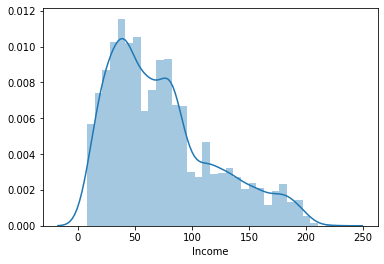

In [27]:
sns.distplot(bankdata['Income'])

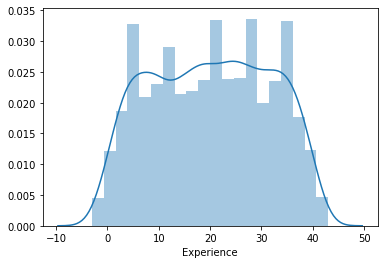

In [28]:
sns.distplot(bankdata['Experience'])

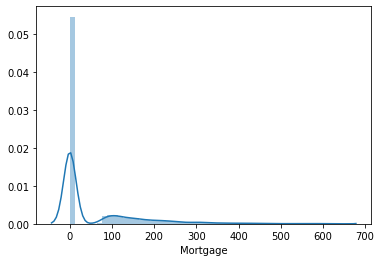

In [29]:
sns.distplot(bankdata['Mortgage'])

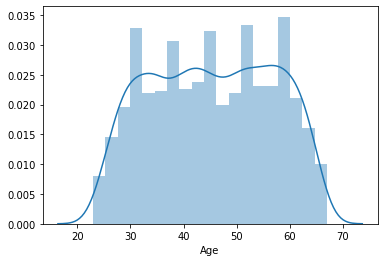

In [30]:
sns.distplot(bankdata['Age'])

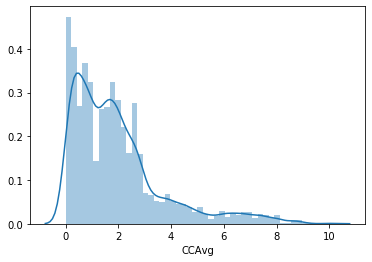

In [31]:
sns.distplot(bankdata['CCAvg'])

### Bivariate Plots

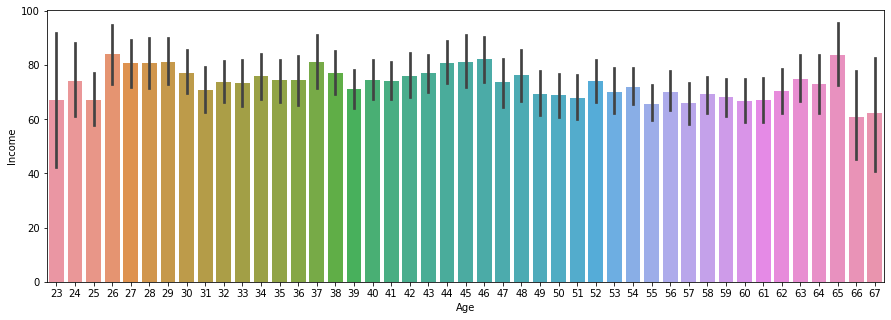

In [34]:
plt.figure(figsize=(15,5))

ax = sns.barplot(x='Age', y='Income', data=bankdata)

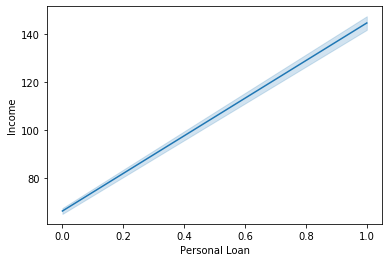

In [39]:
sns.lineplot(x='Personal Loan', y='Income', data=bankdata)

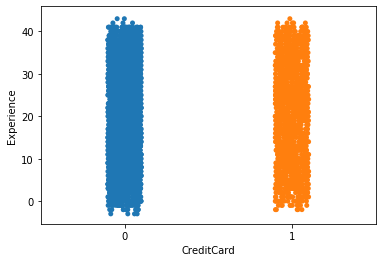

In [40]:
sns.stripplot(bankdata['CreditCard'], bankdata['Experience'], jitter=True)

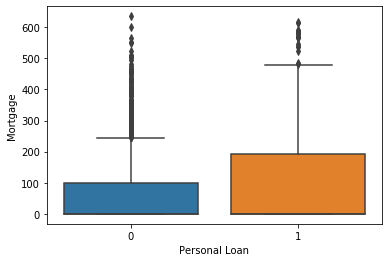

In [43]:
sns.boxplot(bankdata['Personal Loan'], bankdata['Mortgage']);

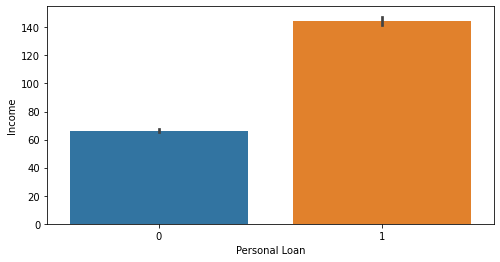

In [109]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="Personal Loan", y="Income", data=bankdata)

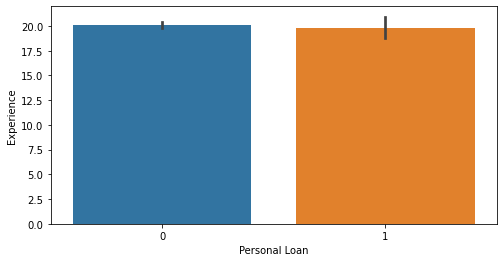

In [111]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="Personal Loan", y="Experience", data=bankdata)

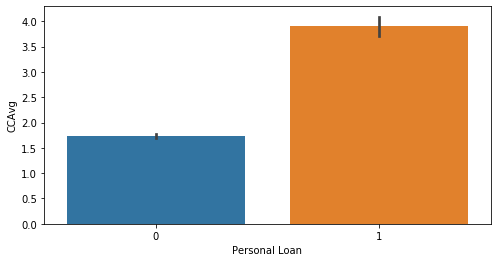

In [52]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="Personal Loan", y="CCAvg", data=bankdata)

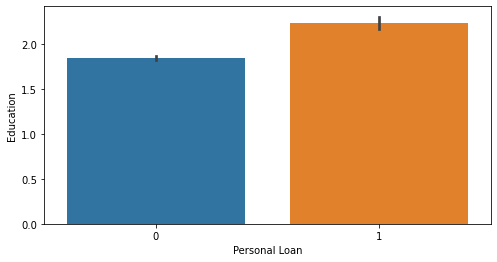

In [118]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="Personal Loan", y="Education", data=bankdata)

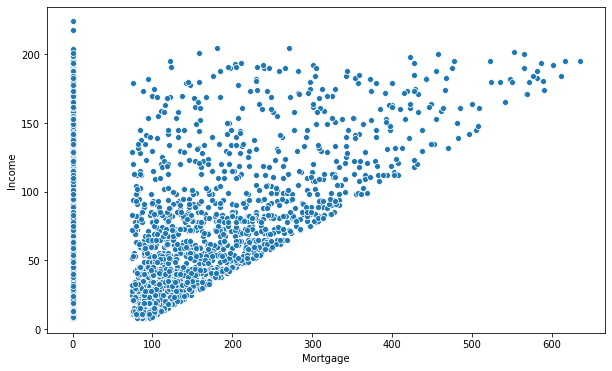

In [50]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x="Mortgage", y="Income", data=bankdata)

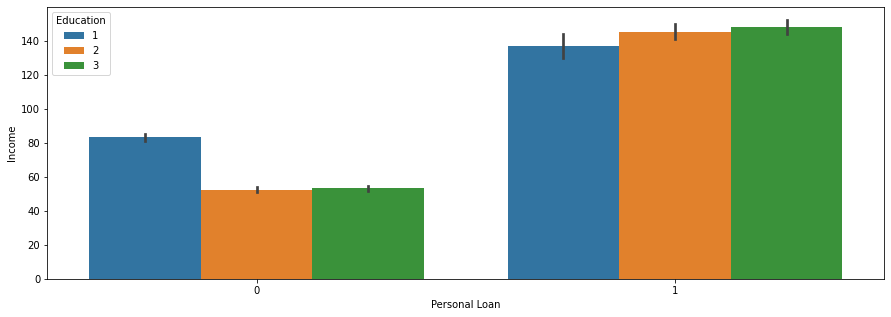

In [119]:
plt.figure(figsize=(15,5))
sns.barplot(data=bankdata,x='Personal Loan',y='Income',hue='Education')
plt.show()

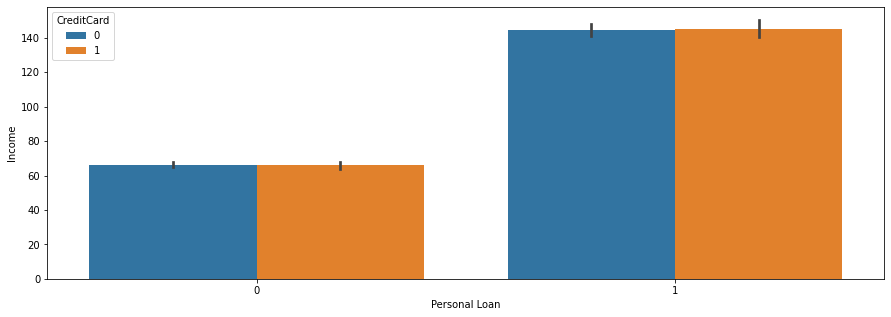

In [120]:
plt.figure(figsize=(15,5))
sns.barplot(data=bankdata,x='Personal Loan',y='Income',hue='CreditCard')
plt.show()

#### Preparing Data for Model

In [330]:
bankdata_df = bankdata.drop(['ID', 'ZIP Code', 'Online'], axis = 1)

In [331]:
bankdata_df.groupby(['Personal Loan', 'Mortgage', 'CreditCard'])['Education'].value_counts()

Personal Loan  Mortgage  CreditCard  Education
0              0.00      0           1            966
                                     3            642
                                     2            609
                         1           1            427
                                     3            264
                                                 ... 
1              587.00    1           3              1
               589.00    0           3              1
               590.00    0           2              1
               612.00    0           3              1
               617.00    0           1              1
Name: Education, Length: 982, dtype: int64

In [332]:
bankdata_df.groupby(['Experience', 'Age'])['Personal Loan'].value_counts()

Experience  Age  Personal Loan
-3          23   0                 2
            24   0                 2
-2          23   0                 4
            24   0                 9
            25   0                 1
                                  ..
 41         66   0                17
            67   0                 5
 42         66   0                 4
            67   0                 4
 43         67   0                 3
Name: Personal Loan, Length: 351, dtype: int64

In [333]:
# removing the negatives from the 'Experience' variable using 'Age' as a criteria
bankdata_df.loc[(bankdata['Age']==23) & (bankdata['Experience']<0), 'Experience']=0
bankdata_df.loc[(bankdata['Age']==24) & (bankdata['Experience']<0), 'Experience']=0
bankdata_df.loc[(bankdata['Age']==25) & (bankdata['Experience']<0), 'Experience']=1
bankdata_df.loc[(bankdata['Age']==26) & (bankdata['Experience']<0), 'Experience']=1
bankdata_df.loc[(bankdata['Age']==28) & (bankdata['Experience']<0), 'Experience']=3
bankdata_df.loc[(bankdata['Age']==29) & (bankdata['Experience']<0), 'Experience']=3

In [334]:
bankdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   float64 
 3   Family              5000 non-null   int64   
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   float64 
 7   Personal Loan       5000 non-null   category
 8   Securities Account  5000 non-null   category
 9   CD Account          5000 non-null   category
 10  CreditCard          5000 non-null   category
dtypes: category(5), float64(3), int64(3)
memory usage: 259.4 KB


In [335]:
bankdata_df.describe().T # confirmthat no negative variable exist in the data

,count,mean,std,min,25%,50%,75%,max
Age,"5,000.00",45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,"5,000.00",20.13,11.43,0.00,10.00,20.00,30.00,43.00
Income,"5,000.00",73.77,46.03,8.00,39.00,64.00,98.00,224.00
Family,"5,000.00",2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,"5,000.00",1.94,1.75,0.00,0.70,1.50,2.50,10.00
Mortgage,"5,000.00",56.50,101.71,0.00,0.00,0.00,101.00,635.00


In [247]:
bankdata_df['Personal Loan'].value_counts(normalize=True)

0   0.90
1   0.10
Name: Personal Loan, dtype: float64

There is imbalance in the data

In [248]:
#understanding the distribution of the target variable - 'Personal Loan'
bankdata_df.groupby(['Personal Loan']).mean()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage
Personal Loan,,,,,,,
0,45.37,20.16,66.24,2.37,1.73,1.84,51.79
1,45.07,19.84,144.75,2.61,3.91,2.23,100.85


In [336]:
#Creating the independent variables dataset for the model
x = bankdata_df.drop('Personal Loan', axis = 1)
x

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,CreditCard
0,25,1,49.00,4,1.60,1,0.00,1,0,0
1,45,19,34.00,3,1.50,1,0.00,1,0,0
2,39,15,11.00,1,1.00,1,0.00,0,0,0
3,35,9,100.00,1,2.70,2,0.00,0,0,0
4,35,8,45.00,4,1.00,2,0.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40.00,1,1.90,3,0.00,0,0,0
4996,30,4,15.00,4,0.40,1,85.00,0,0,0
4997,63,39,24.00,2,0.30,3,0.00,0,0,0
4998,65,40,49.00,3,0.50,2,0.00,0,0,0


In [345]:
# creating the dependent variable for the model
y = bankdata_df[['Personal Loan']]
bankdata_df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

#### Splitting Data into Train:Test in ratio 70:30 

In [347]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [348]:
x_train

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,CreditCard
1334,47,22,35.00,2,1.30,1,0.00,0,0,0
4768,38,14,39.00,1,2.00,2,0.00,0,0,0
65,59,35,131.00,1,3.80,1,0.00,0,0,1
177,29,3,65.00,4,1.80,2,244.00,0,0,0
4489,39,13,21.00,3,0.20,2,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2895,60,36,39.00,4,1.30,2,140.00,0,0,0
2763,55,31,13.00,4,0.70,1,0.00,0,0,0
905,46,22,28.00,1,1.00,1,84.00,0,0,1
3980,46,22,89.00,4,1.40,2,0.00,0,0,0


In [252]:
x_test

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,CreditCard
2764,31,5,84,1,2.90,3,105,0,0,1
4767,35,9,45,3,0.90,1,101,1,0,0
3814,34,9,35,3,1.30,1,0,0,0,0
3499,49,23,114,1,0.30,1,286,0,0,0
2735,36,12,70,3,2.60,2,165,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4140,63,38,32,1,1.50,2,0,0,0,0
3969,38,11,75,3,2.33,2,0,0,0,0
2535,50,25,21,2,0.70,3,129,0,0,0
1361,50,26,38,4,0.90,2,0,0,0,0


In [254]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(bankdata_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(bankdata_df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


##### Model Building

In [355]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [356]:
y_predict = model.predict(x_test)

In [358]:
pd.DataFrame(model.intercept_)
pd.DataFrame(model.coef_)

,0,1,2,3,4,5,6,7,8,9
0,-0.53,0.52,0.05,0.72,0.14,1.83,0.00,0.07,2.09,-0.46


#### Printing the metrics for the model

In [359]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy 0.9508571428571428

Testing accuracy 0.9466666666666667

Confusion Matrix


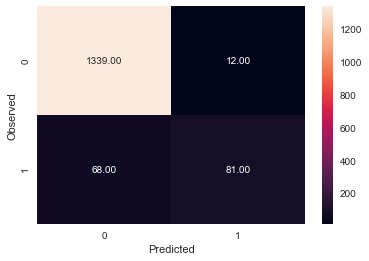

None

Recall: 0.5436241610738255

Precision: 0.8709677419354839

F1 Score: 0.6694214876033059

Roc Auc Score: 0.7673709258366908


In [360]:
print("Training accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

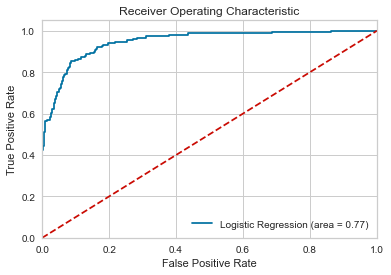

In [362]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Improving Model Performance using its Parameters

To improve the model, some of its parameter of the default model has to be iteratively analysed to get the best values that optimise performance

In [363]:
# Check default parameters of Logist Model
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [364]:
# iteratively run different values of solver and check for their impact on the model accuracy
# using all solvers with l2
train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.951, 0.949, 0.951, 0.913, 0.908]

[0.95, 0.944, 0.946, 0.909, 0.907]


In [279]:
# using liblinear and saga only as solvers for l1
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.95, 0.908]

[0.948, 0.907]


'newton-cg' and 'liblinear' are the best solvers for improving the model accuracy for l2 and l1 respectively

In [280]:
# iteratively run different values of 'C' and check for their impact on the model accuracy

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i) 
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3)) 
    test_score.append(round(model.score(x_test, y_test),3))   
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.875, 0.893, 0.895, 0.898, 0.898, 0.899]

[0.868, 0.889, 0.891, 0.895, 0.895, 0.895]


C value of 0.5 gives the best value for the accuracy

Training accuracy 0.8977142857142857

Testing accuracy 0.8946666666666667

Confusion Matrix


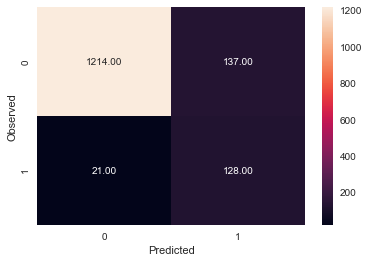

None

Recall: 0.8590604026845637

Precision: 0.4830188679245283

F1 Score: 0.6183574879227054

Roc Auc Score: 0.8788270185147468


In [373]:
#Using the optimal 'C' and solver values derived from the iteration process, the final model uses a liblinear solver and 0.5 as C
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', class_weight='balanced', C=0.5) 
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print("Training accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

#### Business Understanding of the Model

Interpretation of the Confusion matrix:

TP- True Positive (observed=1,predicted=1):

    Predicted that the liability customer will be converted to a Personal Loan Customer and the Customer was converted

FP- False Positive (observed=0,predicted=1):

    Predicted that the liability customer will be converted to a Personal Loan Customer but the Customer was not converted

TN- True Negative (observed=0,predicted=0):

    Predicted that the liability customer will not be converted to a Personal Loan Customer and the Customer was not converted

FN- False Negative (observed=1,predicted=0):

    Predicted that the liability customer will not be converted to a Personal Loan Customer but the Customer was converted

In its campaign, Thera Bank wants to improve the conversion rate of its liability to Personal Loan customers with target marketing at minimum budget. The bank should budgeted more resources to those who were predicted not to be converted but eventually were converted i.e more number of False Negative(FN). Essentially, Recall is a very important metric for this model.

Funds allocated for the False Positives(FP) is less efficient as this will not improve the conversion rate and that marketing strategy will not achieve the desired Bank's objectives.

Once an appropriate threshold for the accuracy has been set, the model can be deployed for a more efficient marketing campaign to convert liability customers to Personal Loan customers.